In this notebook we attempt to solve the problem in [this video](https://www.instagram.com/reel/DSJ4wGfCiKb/?igsh=NmxmdGl3NTZzMXEz), which can extrapolate to other problems of a similar kind.  
You may first want to check [this notebook](https://github.com/GonxaTroll/ds-log-2026/tree/main/w01_simple_path_finding/nodes_edges_extraction_from_img.ipynb), which employs a simple approach to extract the graph elements from an image.

In [1]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Initialize an undirected graph
G = nx.Graph()

# Add nodes numbered from 0 to 13
nodes = {
    2: (0, 2), 3: (1, 2), 4: (2, 2),
    6: (0, 1), 7: (1, 1), 8: (2, 1),
    10: (0, 0), 11: (1, 0), 12: (2, 0),
    # Right Column (5 nodes high)
    1: (3, 3), 5: (3, 2), 9: (3, 1), 13: (3, 0),
    14: (3, -1)
}

G.add_nodes_from(nodes.keys())

Given the initial graph, we would assume that they want us to solve this problem by only going left, right, up, or down.
Therefore, we will only consider horizontal and vertical edges, as well as direct diagonal edges.

However, it might also be possible to go diagonally from certain nodes to others. We will only consider those cases in which we don't go through other nodes to reach the desired nodes.

In [3]:
# Define edges for horizontal and vertical connections
horizontal_vertical_edges = [
    (1, 5),
    (2, 3), (3, 4), (4, 5),
    (2, 6), (3, 7), (4, 8), (5, 9),
    (6, 7), (7, 8), (8, 9),
    (6, 10), (7, 11), (8, 12), (9, 13),
    (10, 11), (11, 12), (12, 13),
    (13, 14)
]

# Define edges for direct diagonal connections
direct_diagonal_edges = [
    (1, 2), (1, 3), (1, 4),
    (2, 7), (3, 6), (3, 8), (4, 7), (4, 9), (5, 8),
    (6, 11), (7, 10), (7, 12), (8, 11), (8, 13), (9, 12),
    (10, 14), (11, 14), (12, 14)
]

We'd like to go through each graph node without coming back to already visited ones.  
In graph theory, this is known as looking for a hamiltonian path / cycle in the graph.  
We can easily check this by looking for simple cycles in the graph and seeing if there is at least one which has all the nodes.  

In [4]:
def get_hamiltonian_paths(graph: nx.Graph):
    for l in nx.simple_cycles(graph):
        if len(l) == graph.number_of_nodes():
            yield l

In [5]:
# Let's try first with horizontal and vertical edges only
G.clear_edges() # Clear any existing edges
G.add_edges_from(horizontal_vertical_edges)
print("Graph with horizontal and vertical edges:")
hamiltonian_paths_hv = get_hamiltonian_paths(G)
print(f"Total Hamiltonian cycles found: {len(list(hamiltonian_paths_hv))}")

Graph with horizontal and vertical edges:
Total Hamiltonian cycles found: 0


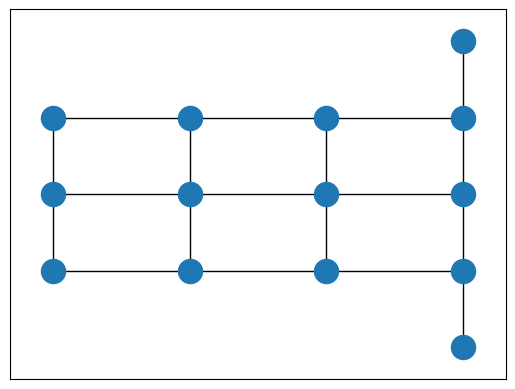

In [6]:
plt.tight_layout()
nodes_horizontal = nx.draw_networkx_nodes(G, pos=nodes)
edges = nx.draw_networkx_edges(G, pos=nodes)
plt.show()

In [7]:
# Now let's try adding diagonal edges as well
G.clear_edges()
G.add_edges_from(horizontal_vertical_edges + direct_diagonal_edges)
print("\nGraph with horizontal, vertical, and diagonal edges:")
hamiltonian_paths_hvd = get_hamiltonian_paths(G)
hamiltonian_paths_hvd = [*hamiltonian_paths_hvd]
print(f"Total Hamiltonian cycles found: {len(hamiltonian_paths_hvd)}")


Graph with horizontal, vertical, and diagonal edges:
Total Hamiltonian cycles found: 4136


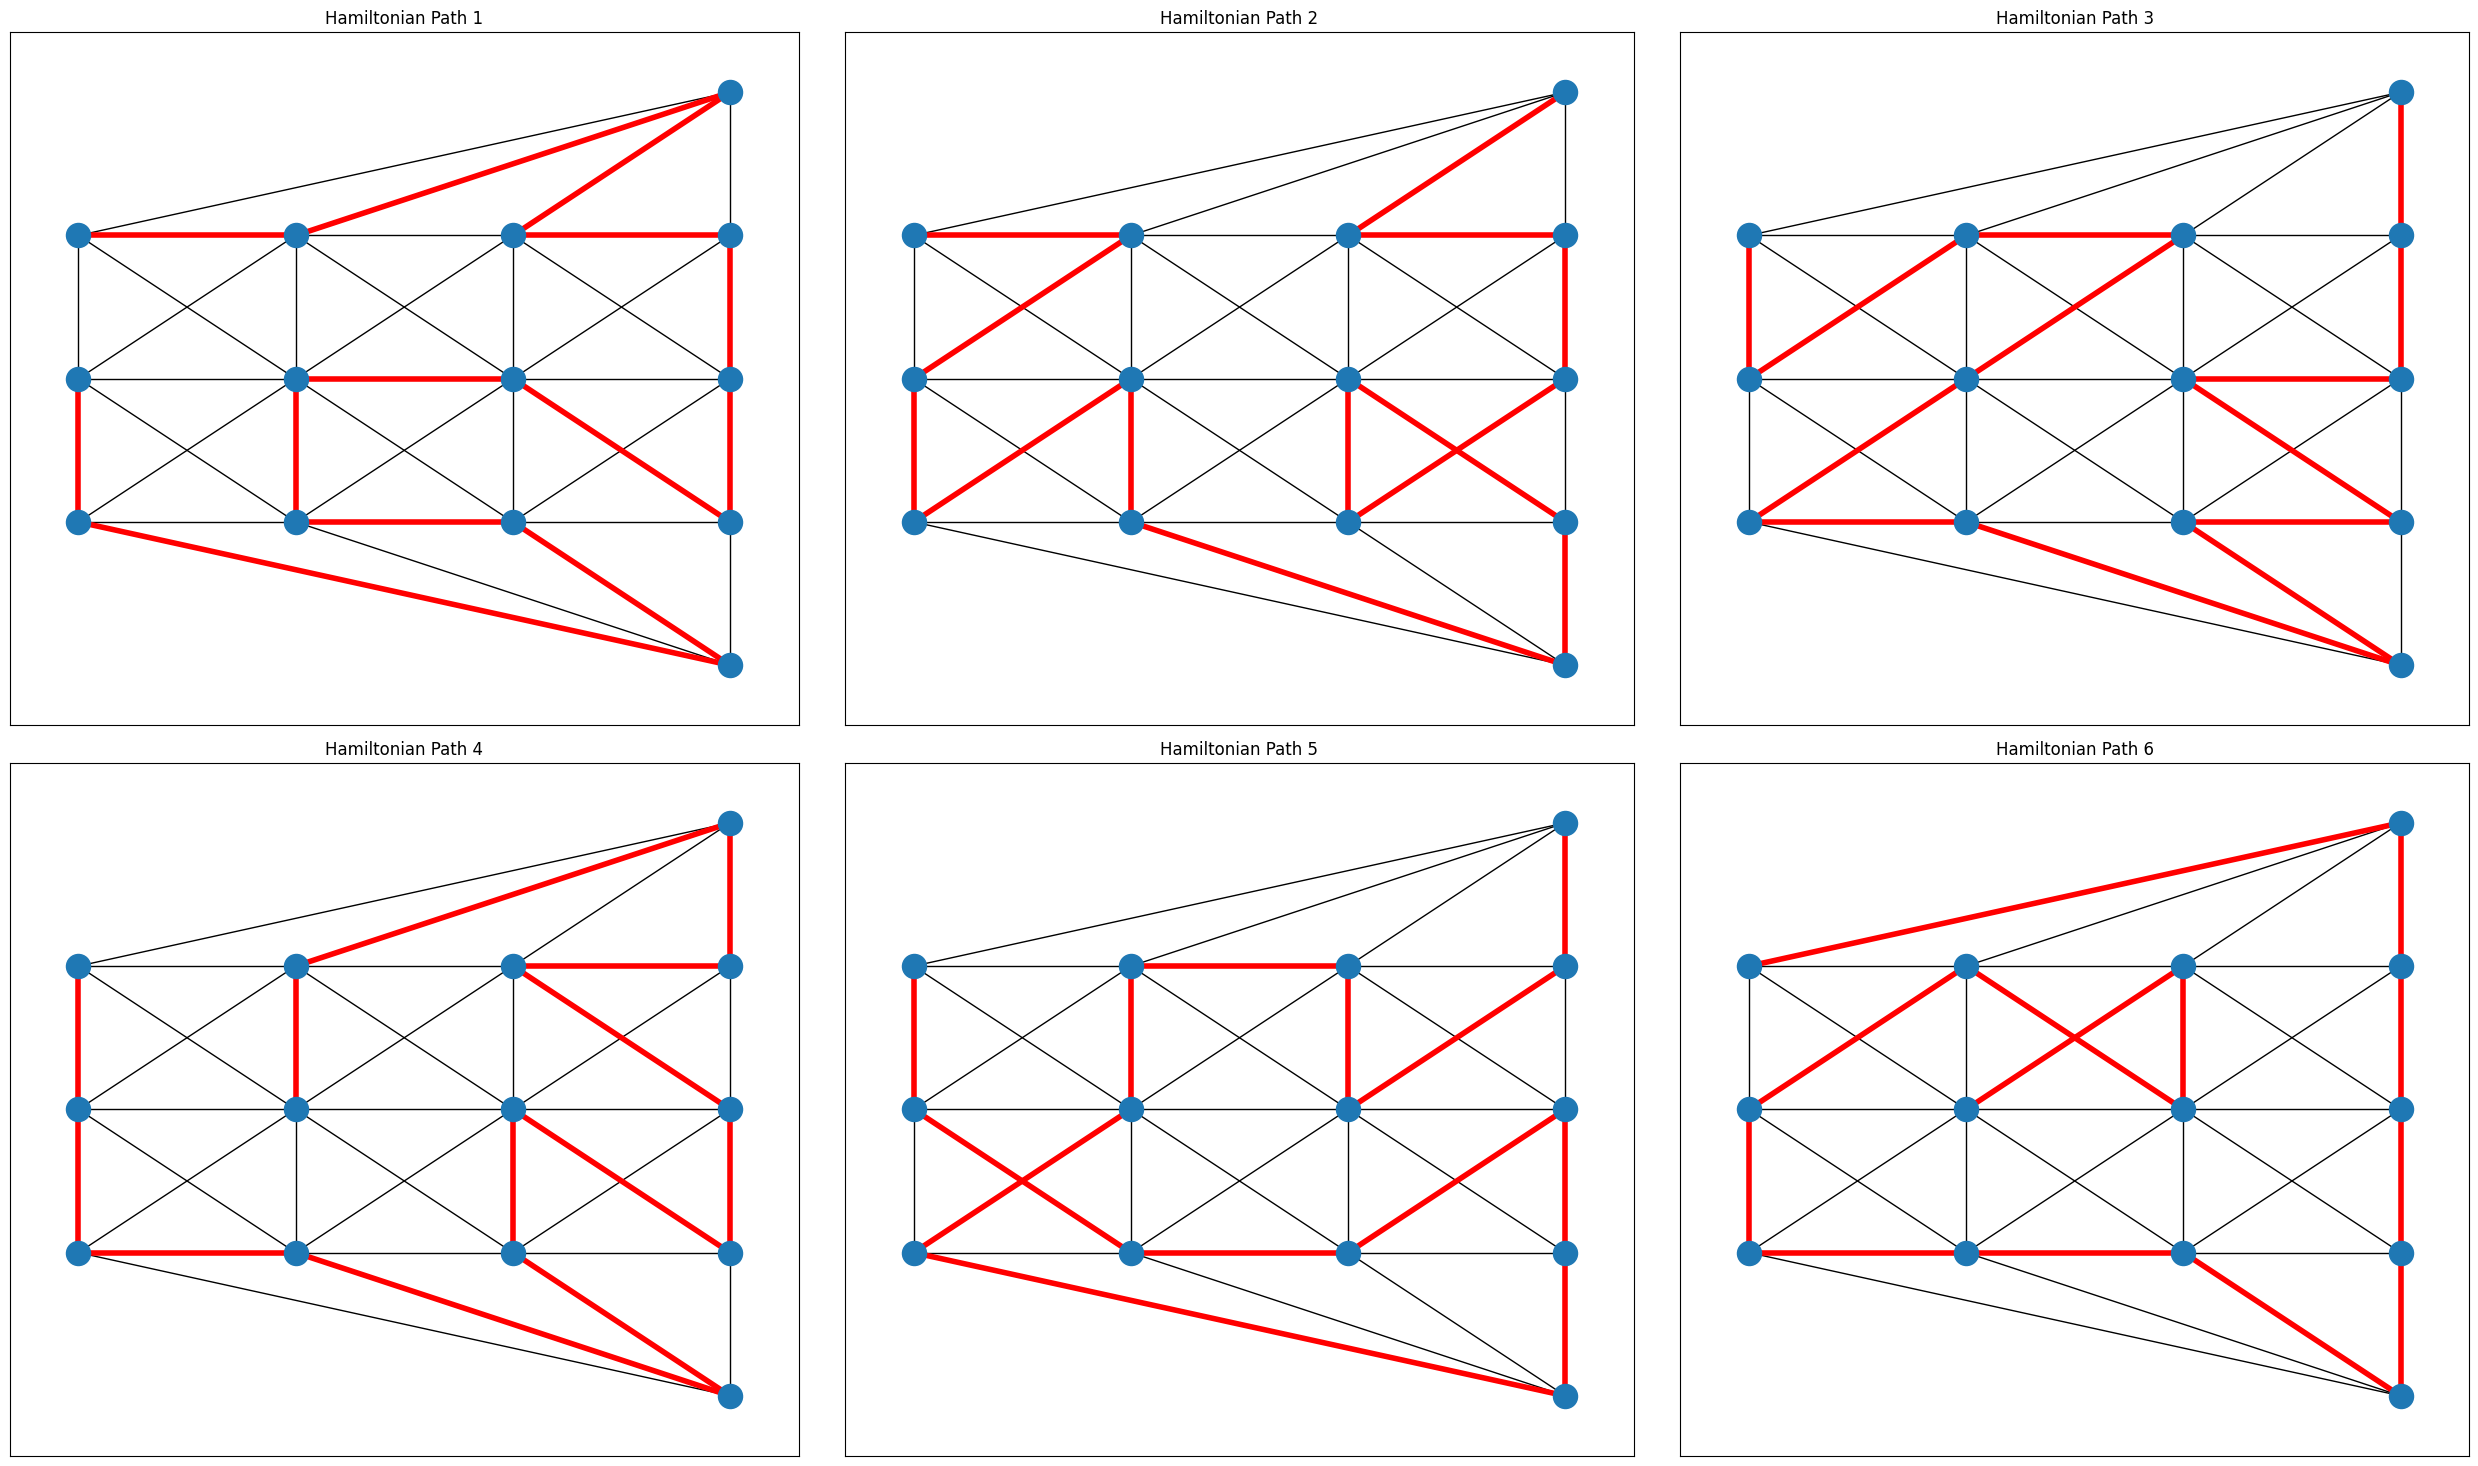

In [8]:
plt.figure(figsize=(25, 15))
for i in range(1, 6 + 1):
    plt.subplot(2, 3, i)
    plt.title(f"Hamiltonian Path {i}")
    plt.tight_layout()
    nodes_total = nx.draw_networkx_nodes(G, pos=nodes)
    edges = nx.draw_networkx_edges(G, pos=nodes)
    hamiltonian = list(hamiltonian_paths_hvd)[i * len(hamiltonian_paths_hvd) // 6 - 1]
    hamiltonian_edges = [(hamiltonian[i], hamiltonian[(i + 1) % len(hamiltonian)]) for i in range(len(hamiltonian) - 1)]
    hamiltonian_edges = nx.draw_networkx_edges(G, pos=nodes, edgelist=hamiltonian_edges, edge_color='r', width=4)
plt.show()

All in all, there is no way we can pass through each data point if we only went horizontally or vertically.  
However, if we could go diagonally (without crossing other nodes), there are thousands of possible paths for this particular example.  

Notes:
- In other challenges, they ask the viewers to use all connections - this would result in knowing if there is an [Eulerian path / cycle](https://networkx.org/documentation/stable/reference/algorithms/euler.html).